# Data

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns# Figure size
X_train= pd.read_csv('X_train_6ZIKlTY.csv', index_col=0)
Y_train= pd.read_csv('y_train_lXj6X5y.csv',index_col=0)
X_test= pd.read_csv('X_test_oiZ2ukx.csv',index_col=0)

print("X Train set Shape:", X_train.shape, 'Y Train shape: ', Y_train.shape)
print("X test shape:", X_test.shape)
X_train.head(20)


X Train set Shape: (55603, 11) Y Train shape:  (55603, 1)
X test shape: (23672, 12)


,patient_id,cohort,sexM,gene,age_at_diagnosis,age,ledd,time_since_intake_on,time_since_intake_off,on,off
Index,,,,,,,,,,,
0,IPLP5212,A,0,LRRK2+,48.5,52.1,607.0,1.9,NaN,7.0,NaN
1,IPLP5212,A,0,LRRK2+,48.5,53.0,666.0,1.9,17.6,12.0,44.0
2,IPLP5212,A,0,LRRK2+,48.5,53.9,717.0,1.2,NaN,6.0,NaN
3,IPLP5212,A,0,LRRK2+,48.5,54.8,770.0,1.5,NaN,11.0,NaN
4,IPLP5212,A,0,LRRK2+,48.5,56.9,885.0,0.3,NaN,24.0,NaN
5,IPLP5212,A,0,LRRK2+,48.5,57.5,NaN,2.4,NaN,16.0,NaN
6,IPLP5212,A,0,LRRK2+,48.5,58.9,835.0,NaN,NaN,10.0,37.0
7,IPLP5212,A,0,LRRK2+,48.5,59.9,888.0,0.2,9.6,31.0,36.0
8,IPLP5212,A,0,LRRK2+,48.5,60.9,952.0,1.5,NaN,11.0,NaN


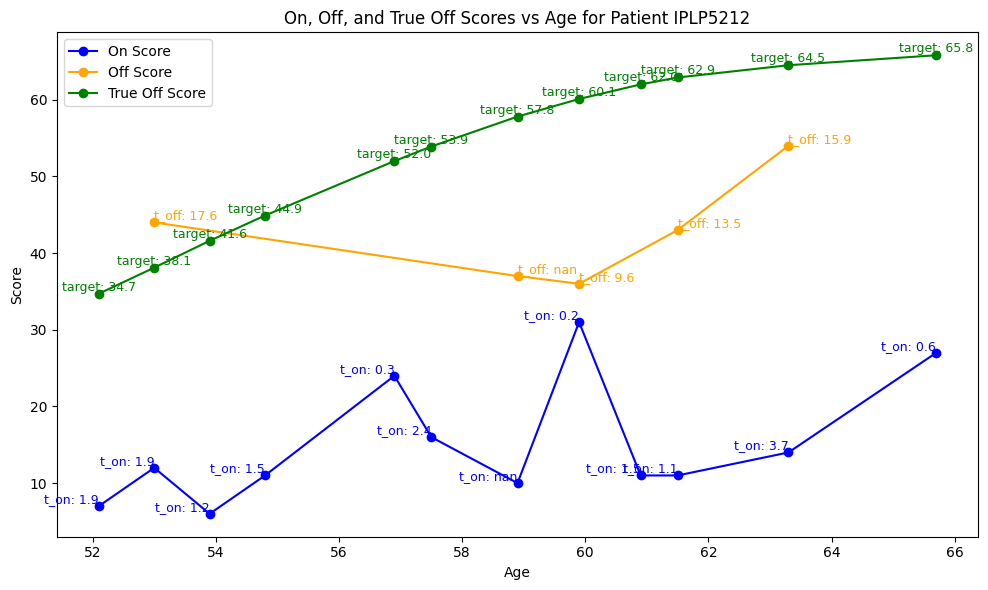

In [2]:
data=X_train
data['target'] = Y_train['target']
df_patient = data[data['patient_id'] == 'IPLP5212']

plt.figure(figsize=(10, 6))

# Plot On Score vs Age
on_data = df_patient.dropna(subset=['on'])
plt.plot(on_data['age'], on_data['on'], marker='o', linestyle='-', label='On Score', color='blue')
for _, row in on_data.iterrows():
    plt.text(row['age'], row['on'], f"t_on: {row['time_since_intake_on']}",
             fontsize=9, color='blue', verticalalignment='bottom', horizontalalignment='right')

# Plot Off Score vs Age
off_data = df_patient.dropna(subset=['off'])
plt.plot(off_data['age'], off_data['off'], marker='o', linestyle='-', label='Off Score', color='orange')
for _, row in off_data.iterrows():
    plt.text(row['age'], row['off'], f"t_off: {row['time_since_intake_off']}",
             fontsize=9, color='orange', verticalalignment='bottom', horizontalalignment='left')

# Plot True Off Score (Target) vs Age
target_data = df_patient.dropna(subset=['target'])
plt.plot(target_data['age'], target_data['target'], marker='o', linestyle='-', label='True Off Score', color='green')
for _, row in target_data.iterrows():
    plt.text(row['age'], row['target'], f"target: {row['target']}",
             fontsize=9, color='green', verticalalignment='bottom', horizontalalignment='center')

plt.xlabel("Age")
plt.ylabel("Score")
plt.title("On, Off, and True Off Scores vs Age for Patient IPLP5212")
plt.legend()
plt.tight_layout()
plt.show()

In [3]:
Y_train.head()

,target
Index,
0,34.7
1,38.1
2,41.6
3,44.9
4,52.0


In [4]:
X_test.head()

,patient_id,cohort,sexM,gene,age_at_diagnosis,age,ledd,time_since_intake_on,time_since_intake_off,on,off,time_since_diagnosis
Index,,,,,,,,,,,,
0,KQYS2327,A,1,NaN,43.8,48.5,791.0,1.7,NaN,25.0,NaN,4.7
1,KQYS2327,A,1,NaN,43.8,49.1,826.0,2.8,NaN,25.0,NaN,5.3
2,KQYS2327,A,1,NaN,43.8,49.5,848.0,0.7,13.8,33.0,41.0,5.7
3,KQYS2327,A,1,NaN,43.8,50.0,874.0,5.2,NaN,34.0,NaN,6.2
4,KQYS2327,A,1,NaN,43.8,50.8,924.0,3.4,13.7,30.0,47.0,7.0


Données démographiques du patient : Âge, sexe et âge au moment du diagnostic (symptômes moteurs).

Cohore: cohorte désigne un groupe de patients atteints de la maladie de Parkinson partageant des caractéristiques ou conditions communes et observés sur une période définie afin d’étudier la progression de la maladie et les résultats des traitements.

Informations génétiques : Marqueurs génétiques pertinents.

ledd = Informations sur les médicaments : Posologie (en dose quotidienne équivalente en lévodopa).

Scores Moteur MDS-UPDRS : Scores ON et OFF, avec le délai indiqué depuis la dernière prise de médicament.

Dans le test, time_since_diagnosis est aussi dispo

## Missing values

In [5]:
print('TRAIN SET MISSING VALUES (%):')
print(X_train.isna().sum()*100/len(X_train))
print('')

TRAIN SET MISSING VALUES (%):
patient_id                0.000000
cohort                    0.000000
sexM                      0.000000
gene                     32.296819
age_at_diagnosis          5.089653
age                       0.000000
ledd                     37.035771
time_since_intake_on     46.652159
time_since_intake_off    78.823085
on                       29.960614
off                      42.096649
target                    0.000000
dtype: float64



Text(0.5, 1.0, 'Heatmap of missing values')

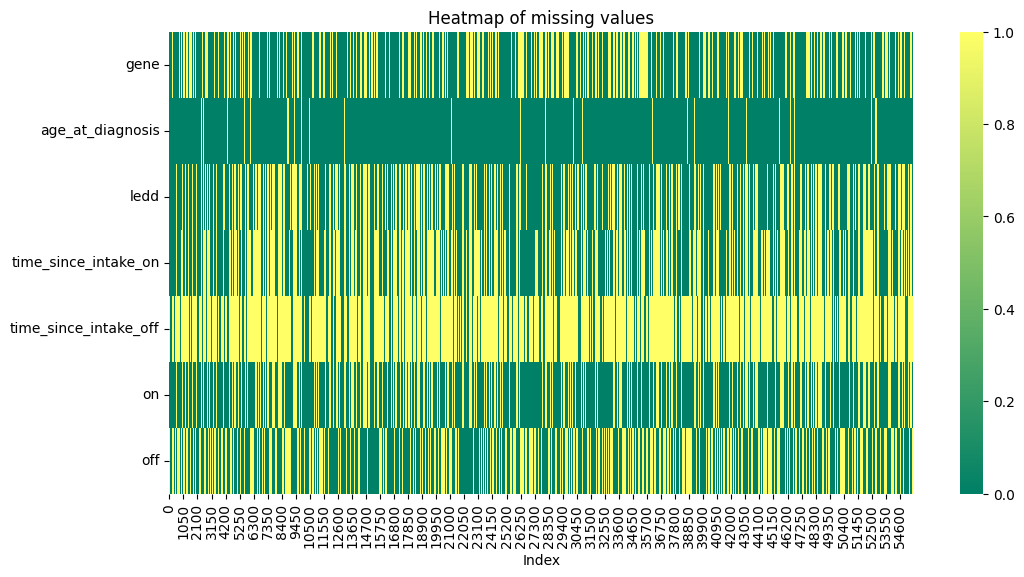

In [6]:
# Heatmap of missing values
na_cols=data.columns[data.isna().any()].tolist()
plt.figure(figsize=(12,6))
sns.heatmap(data[na_cols].isna().T, cmap='summer')
plt.title('Heatmap of missing values')

In [7]:
X_train.nunique()

patient_id               6971
cohort                      2
sexM                        2
gene                        4
age_at_diagnosis          575
age                      1177
ledd                     1356
time_since_intake_on       64
time_since_intake_off     180
on                         80
off                        93
target                    873
dtype: int64

In [8]:
X_train.dtypes

patient_id                object
cohort                    object
sexM                       int64
gene                      object
age_at_diagnosis         float64
age                      float64
ledd                     float64
time_since_intake_on     float64
time_since_intake_off    float64
on                       float64
off                      float64
target                   float64
dtype: object

In [9]:
Y_train.describe()

,target
count,55603.000000
mean,37.331606
std,16.504326
min,0.000000
25%,25.400000
50%,37.100000
75%,49.200000
max,109.500000


/var/folders/zn/74t7wv5n5r593c2rckpn_pbr0000gn/T/ipykernel_2293/3955445892.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_train['target']);


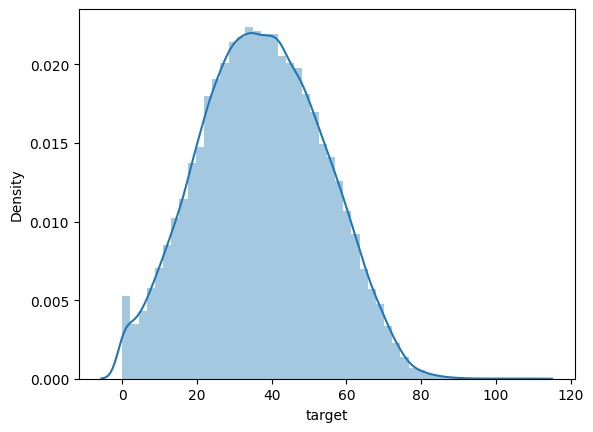

In [10]:
sns.distplot(Y_train['target']);


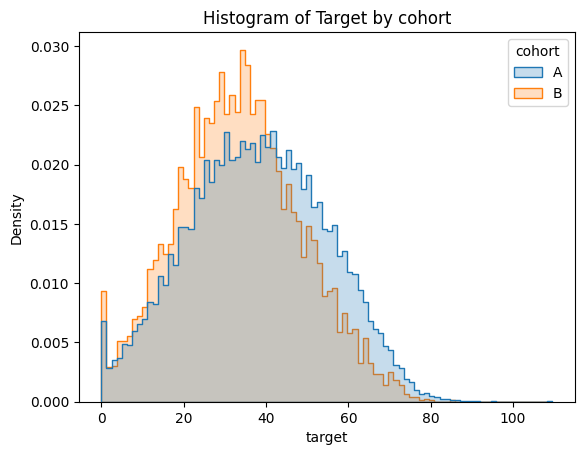

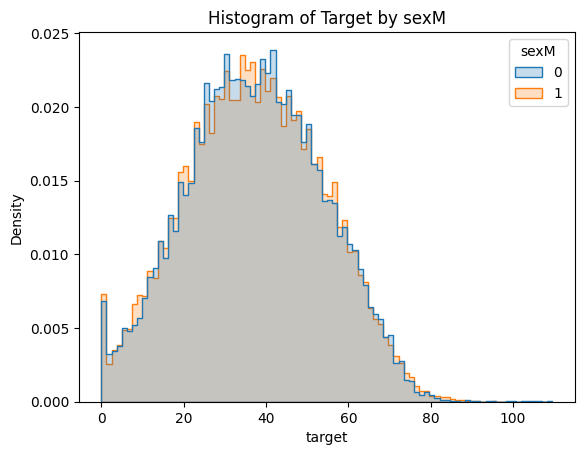

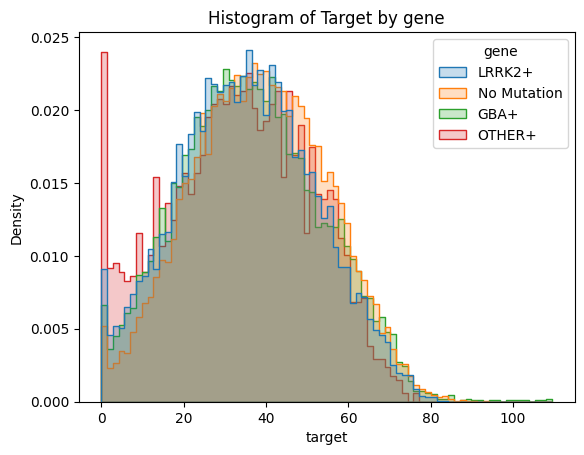

In [11]:
for col in ['cohort', 'sexM', 'gene']:
    plt.figure()  # Create a new figure for each plot
    sns.histplot(data=data, x='target', hue=col, element="step", stat="density", common_norm=False)
    plt.title(f"Histogram of Target by {col}")
    plt.show()  # Display the plot
  

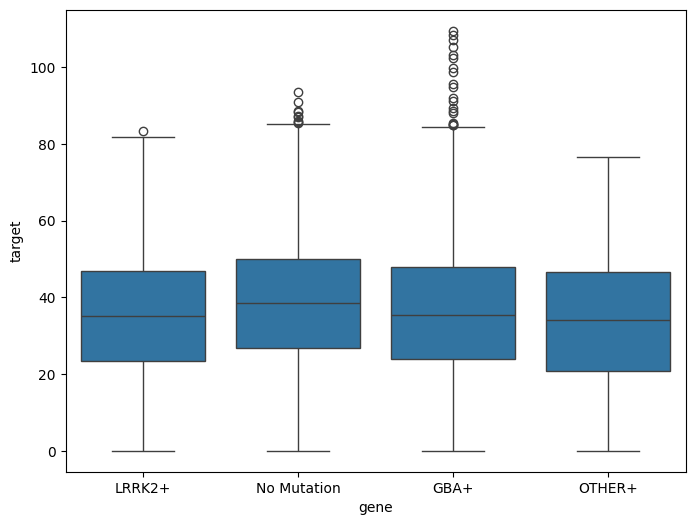

In [12]:
var = 'gene'
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="target", data=data)


     patient_id         gene    on_mean    on_std   off_mean    off_std  \
0      AADG7112  No Mutation  17.666667  1.154701  20.666667   6.429101   
1      AAJS7617  No Mutation        NaN       NaN   9.333333   4.131182   
2      AALB3070       LRRK2+        NaN       NaN   8.125000   5.436320   
3      AALZ2188          NaN  18.100000  6.674162  25.200000  11.222992   
4      AAMF6938       LRRK2+  17.500000  2.121320  15.000000   7.848567   
...         ...          ...        ...       ...        ...        ...   
6966   ZZLF7854          NaN  16.583333  5.107184  30.500000  10.246951   
6967   ZZMR9316       LRRK2+  20.555556  7.923243  34.857143  12.694206   
6968   ZZNX1511  No Mutation  17.100000  6.822349  18.250000  11.354148   
6969   ZZPU4420          NaN  18.333333  6.806859  28.800000   8.136338   
6970   ZZTP1426  No Mutation        NaN       NaN  18.750000   8.180261   

      on_slope  off_slope  
0     0.730051  -0.639854  
1          NaN   1.231948  
2          NaN 

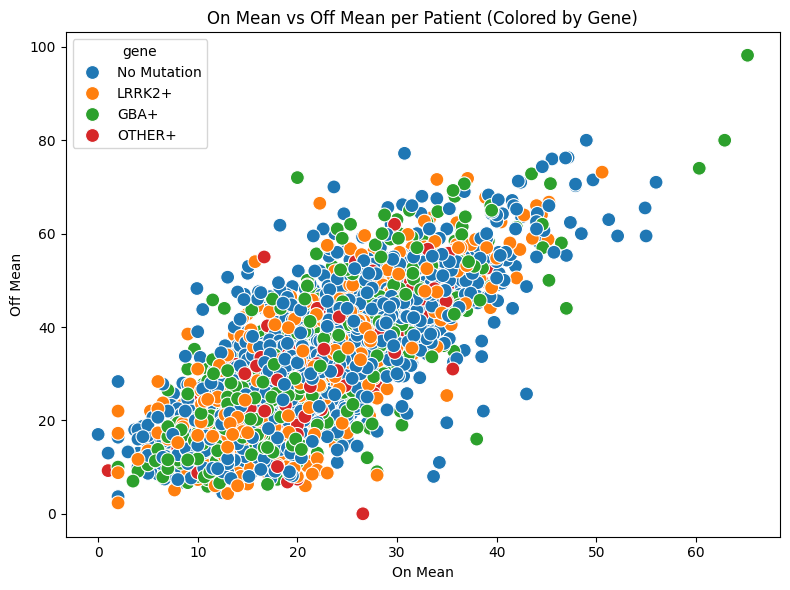

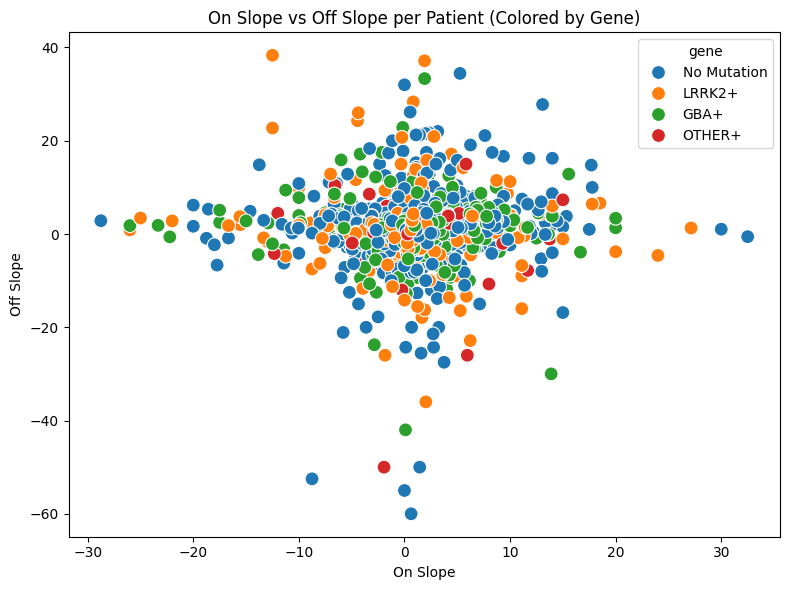

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

# ---- Part 1: Compute Summary Statistics for Each Patient, Including Gene ----

def extract_trend(patient_df, score_col):
    """Extract the slope and intercept for a given score vs. age using linear regression."""
    sub = patient_df[['age', score_col]].dropna()
    if len(sub) < 2:
        return np.nan, np.nan
    result = linregress(sub['age'], sub[score_col])
    return result.slope, result.intercept

summary_stats = []
for patient, group in data.groupby('patient_id'):
    # For a static column like gene, take the first non-null value (assuming consistency)
    gene_val = group['gene'].dropna().unique()
    gene_val = gene_val[0] if len(gene_val) > 0 else np.nan
    
    on_mean = group['on'].mean()
    on_std = group['on'].std()
    off_mean = group['off'].mean()
    off_std = group['off'].std()
    on_slope, _ = extract_trend(group, 'on')
    off_slope, _ = extract_trend(group, 'off')
    
    summary_stats.append({
        'patient_id': patient,
        'gene': gene_val,
        'on_mean': on_mean,
        'on_std': on_std,
        'off_mean': off_mean,
        'off_std': off_std,
        'on_slope': on_slope,
        'off_slope': off_slope
    })

summary_df = pd.DataFrame(summary_stats)
print(summary_df)

# ---- Part 2: Scatter Plots with Colors Representing Gene ----

# Plot A: Scatter plot of on_mean vs off_mean, colored by gene
plt.figure(figsize=(8,6))
sns.scatterplot(data=summary_df, x='on_mean', y='off_mean', hue='gene', s=100)
plt.title('On Mean vs Off Mean per Patient (Colored by Gene)')
plt.xlabel('On Mean')
plt.ylabel('Off Mean')
plt.tight_layout()
plt.show()

# Plot B: Scatter plot of on_slope vs off_slope, colored by gene
plt.figure(figsize=(8,6))
sns.scatterplot(data=summary_df, x='on_slope', y='off_slope', hue='gene', s=100)

plt.title('On Slope vs Off Slope per Patient (Colored by Gene)')
plt.xlabel('On Slope')
plt.ylabel('Off Slope')
plt.tight_layout()
plt.show()

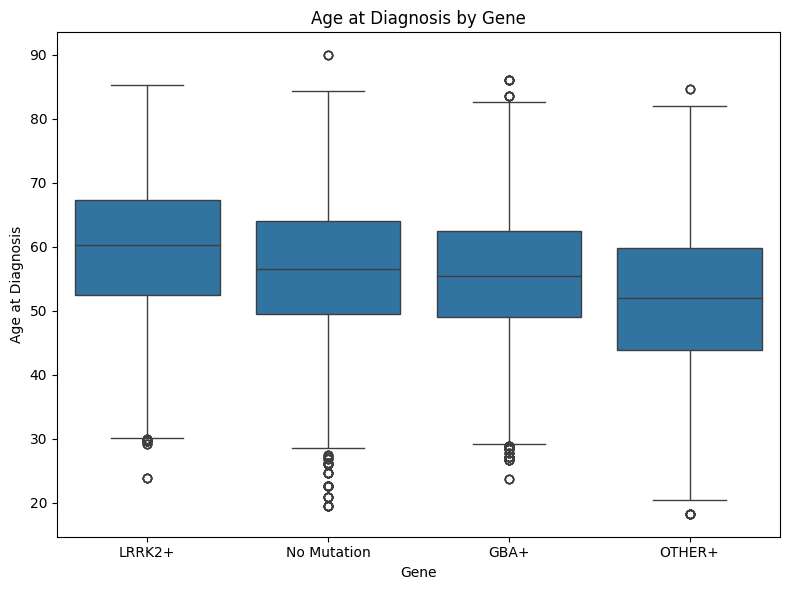

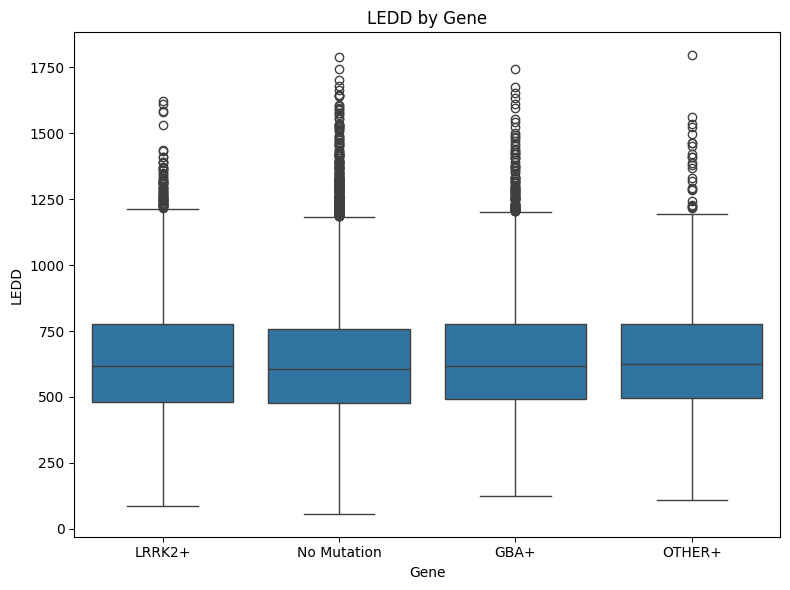

In [14]:
plt.figure(figsize=(8,6))
sns.boxplot(x='gene', y='age_at_diagnosis', data=data)
plt.title("Age at Diagnosis by Gene")
plt.xlabel("Gene")
plt.ylabel("Age at Diagnosis")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,6))
sns.boxplot(x='gene', y='ledd', data=data)
plt.title("LEDD by Gene")
plt.xlabel("Gene")
plt.ylabel("LEDD")
plt.tight_layout()
plt.show()

HistGradientBoosting Accuracy: 0.558
              precision    recall  f1-score   support

        GBA+       0.62      0.21      0.31       782
      LRRK2+       0.53      0.35      0.42       984
 No Mutation       0.56      0.87      0.68      1766
      OTHER+       0.65      0.22      0.33       233

    accuracy                           0.56      3765
   macro avg       0.59      0.41      0.44      3765
weighted avg       0.57      0.56      0.51      3765



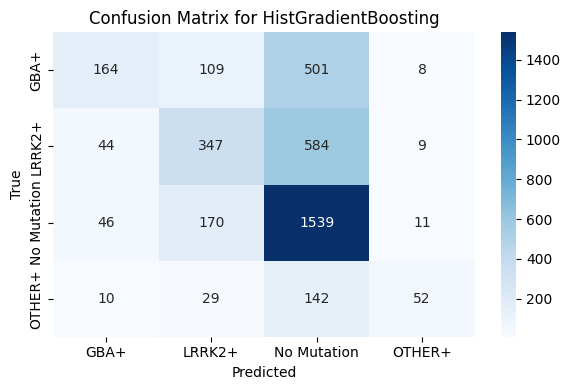

Logistic Regression Accuracy: 0.341
              precision    recall  f1-score   support

        GBA+       0.28      0.04      0.07       782
      LRRK2+       0.37      0.56      0.45       984
 No Mutation       0.62      0.32      0.42      1766
      OTHER+       0.11      0.60      0.19       233

    accuracy                           0.34      3765
   macro avg       0.34      0.38      0.28      3765
weighted avg       0.45      0.34      0.34      3765



/Users/vakili/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


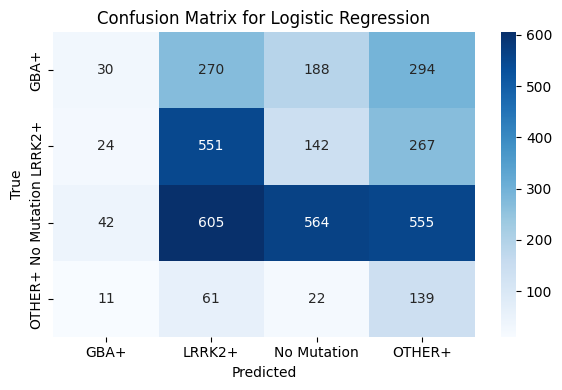

Random Forest Accuracy: 0.627
              precision    recall  f1-score   support

        GBA+       0.59      0.46      0.52       782
      LRRK2+       0.59      0.52      0.55       984
 No Mutation       0.65      0.80      0.72      1766
      OTHER+       0.68      0.32      0.44       233

    accuracy                           0.63      3765
   macro avg       0.63      0.53      0.56      3765
weighted avg       0.62      0.63      0.62      3765



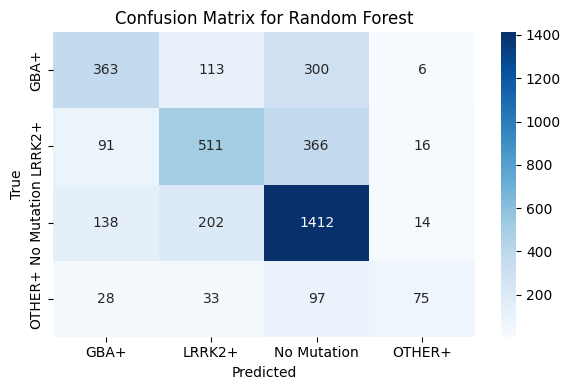

Decision Tree Accuracy: 0.657
              precision    recall  f1-score   support

        GBA+       0.58      0.59      0.59       782
      LRRK2+       0.61      0.58      0.60       984
 No Mutation       0.72      0.74      0.73      1766
      OTHER+       0.57      0.54      0.55       233

    accuracy                           0.66      3765
   macro avg       0.62      0.61      0.62      3765
weighted avg       0.66      0.66      0.66      3765



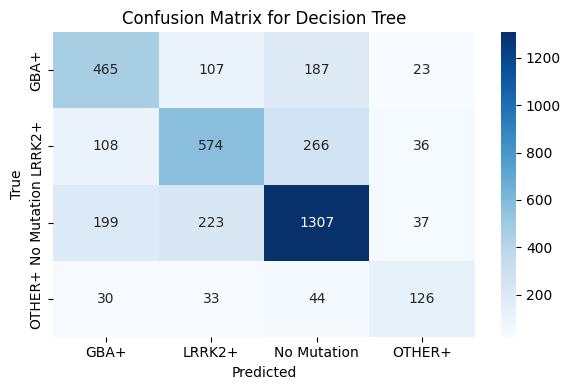

SVC Accuracy: 0.352
              precision    recall  f1-score   support

        GBA+       0.26      0.29      0.27       782
      LRRK2+       0.38      0.53      0.44       984
 No Mutation       0.65      0.26      0.38      1766
      OTHER+       0.15      0.51      0.23       233

    accuracy                           0.35      3765
   macro avg       0.36      0.40      0.33      3765
weighted avg       0.47      0.35      0.36      3765



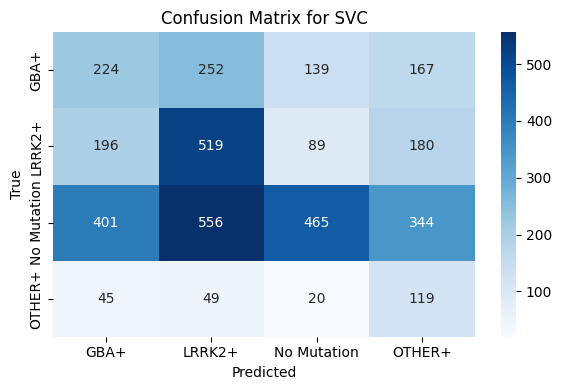

KNN Accuracy: 0.482
              precision    recall  f1-score   support

        GBA+       0.35      0.37      0.36       782
      LRRK2+       0.41      0.42      0.42       984
 No Mutation       0.58      0.61      0.60      1766
      OTHER+       0.43      0.14      0.21       233

    accuracy                           0.48      3765
   macro avg       0.44      0.39      0.40      3765
weighted avg       0.48      0.48      0.48      3765



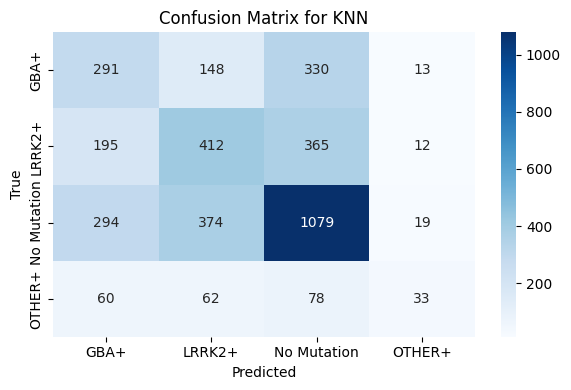

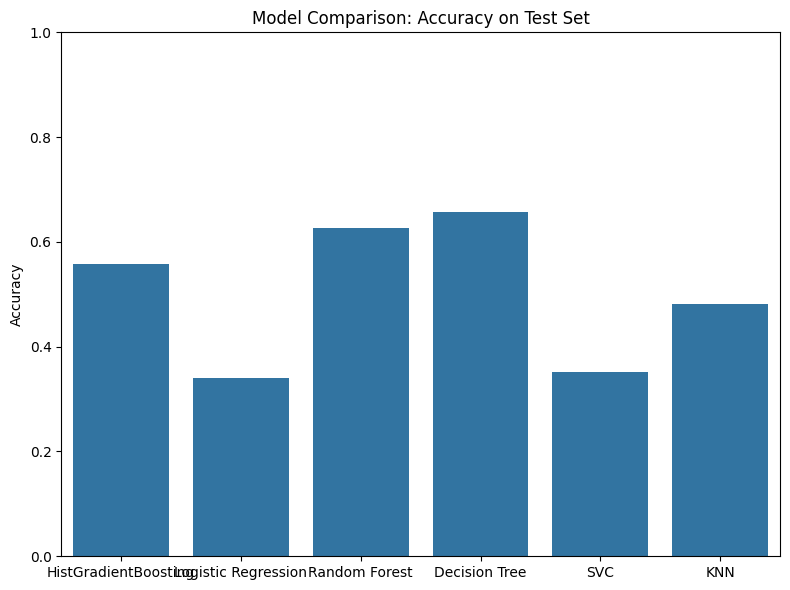

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Classifiers from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# --- Prepare the Data ---
# Filter to rows with non-missing gene values
df_model = data[data['gene'].notna()].copy()

# Encode gene labels to numeric values
le = LabelEncoder()
df_model['gene_enc'] = le.fit_transform(df_model['gene'])

# Select features: 'cohort', 'sexM', 'age_at_diagnosis', 'age', and 'target'
X = df_model[['cohort', 'sexM', 'age_at_diagnosis', 'age', 'target']].copy()
# One-hot encode 'cohort' (since it's categorical)
X = pd.get_dummies(X, columns=['cohort'], drop_first=True)

# Target variable: encoded gene labels
y = df_model['gene_enc']

# Split into training and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# --- Define Pipelines with Class Imbalance Handling ---
pipelines = {}

# 1. HistGradientBoostingClassifier (handles missing values natively)
pipelines['HistGradientBoosting'] = HistGradientBoostingClassifier(random_state=42)

# 2. Logistic Regression (with imputation, scaling, and balanced class weights)
pipelines['Logistic Regression'] = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(multi_class='multinomial', solver='lbfgs', 
                               max_iter=1000, random_state=42, class_weight='balanced'))
])

# 3. Random Forest (with imputation and balanced class weights)
pipelines['Random Forest'] = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('clf', RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'))
])

# 4. Decision Tree (with imputation and balanced class weights)
pipelines['Decision Tree'] = Pipeline([
    ('clf', DecisionTreeClassifier(random_state=42, class_weight='balanced'))
])

results = {}

# --- Train, Evaluate, and Plot for Each Model ---
for name, model in pipelines.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.3f}")
    
    # Convert numeric predictions back to gene labels for a clearer report.
    y_test_labels = le.inverse_transform(y_test)
    y_pred_labels = le.inverse_transform(y_pred)
    print(classification_report(y_test_labels, y_pred_labels))
    
    # Plot confusion matrix with gene labels
    cm = confusion_matrix(y_test_labels, y_pred_labels, labels=le.classes_)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.tight_layout()
    plt.show()

# --- Compare Model Accuracies ---
plt.figure(figsize=(8,6))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.title("Model Comparison: Accuracy on Test Set")
plt.tight_layout()
plt.show()

In [34]:
gene_counts = data['gene'].value_counts()
print(gene_counts)

gene
No Mutation    17811
LRRK2+          9331
GBA+            8097
OTHER+          2406
Name: count, dtype: int64
